# Energy consumption

## Import data from .xlsx spreadsheet

In [1]:
# https://www.datacamp.com/community/tutorials/python-excel-tutorial

import pandas as pd

file = 'energy_consumption.xlsx'

xl = pd.ExcelFile(file)

df = xl.parse('Tabelle1')

#Alternative way to load a sheet into a dataframe
#df = pd.read_excel(xl, 'Tabelle1')

## Data inspection

In [2]:
#Pandas introduction: https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
#Pandas cheat sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

df.set_index('date', inplace=True)
print(df)

              a      b      c      d      e      f      g      h      i     j
date                                                                         
20180901  44107  41201  14946  24385  15849  17370  16918  24301  40200  8506
20181001  44395  41494  15074  24526  15966  17531  17052  24482  40713  8580
20181101  44715  41814  15196  24691  16106  17702  17197  24691  41361  8661
20181201  45058  42136  15350  24837  16244  17878  17346  24906  42000  8743
20190101  45414  42473  15512  24990  16396  18027  17509  25152  42644  8828
20190201  45818  42809  15662  25172  16556  18203  17644  25381  43333  8910


In [25]:
df_diff = df.diff()
print(df_diff)

              a      b      c      d      e      f      g      h      i     j
date                                                                         
20180901    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN
20181001  288.0  293.0  128.0  141.0  117.0  161.0  134.0  181.0  513.0  74.0
20181101  320.0  320.0  122.0  165.0  140.0  171.0  145.0  209.0  648.0  81.0
20181201  343.0  322.0  154.0  146.0  138.0  176.0  149.0  215.0  639.0  82.0
20190101  356.0  337.0  162.0  153.0  152.0  149.0  163.0  246.0  644.0  85.0
20190201  404.0  336.0  150.0  182.0  160.0  176.0  135.0  229.0  689.0  82.0


In [27]:
df_diff.describe()

,a,b,c,d,e,f,g,h,i,j
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,342.200000,321.600000,143.200000,157.400000,141.400000,166.600000,145.200000,216.000000,626.600000,80.800000
std,43.130036,17.784825,17.297399,16.440803,16.334014,11.588788,11.840608,24.207437,66.545473,4.086563
min,288.000000,293.000000,122.000000,141.000000,117.000000,149.000000,134.000000,181.000000,513.000000,74.000000
25%,320.000000,320.000000,128.000000,146.000000,138.000000,161.000000,135.000000,209.000000,639.000000,81.000000
50%,343.000000,322.000000,150.000000,153.000000,140.000000,171.000000,145.000000,215.000000,644.000000,82.000000
75%,356.000000,336.000000,154.000000,165.000000,152.000000,176.000000,149.000000,229.000000,648.000000,82.000000
max,404.000000,337.000000,162.000000,182.000000,160.000000,176.000000,163.000000,246.000000,689.000000,85.000000


## Visualization

In [42]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
#style.use('ggplot')

In [43]:
x = range(1,len(df_diff))

In [44]:
df_diff.columns

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

### Monthly energy consumption per party

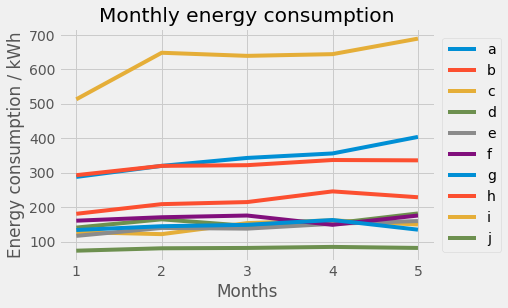

In [50]:
for i in range(len(df_diff.columns)):
    plt.plot(x, df_diff.iloc[1:,i])
    
plt.title("Monthly energy consumption")
plt.legend(df_diff.columns, loc = "center left", bbox_to_anchor = (1, 0.5))
plt.xlabel("Months")
plt.ylabel("Energy consumption / kWh")
plt.show()

### Total energy consumption per party

In [77]:
df_diff.sum().mean()

1170.5

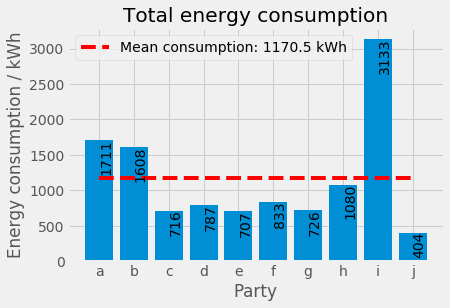

In [91]:
plt.bar(df_diff.columns, df_diff.sum())
plt.xticks(df_diff.columns)
plt.title("Total energy consumption")
plt.xlabel("Party")
plt.ylabel("Energy consumption / kWh")
label = "Mean consumption: " + str(df_diff.sum().mean()) + " kWh"
plt.hlines(df_diff.sum().mean(), df_diff.columns[0], df_diff.columns[-1], color = "r", linestyles = "dashed", \
           label = label
          )
plt.legend()
for a,b in zip(df_diff.columns, df_diff.sum()):
    plt.text(a, b - 140, str(int(b)), rotation = "vertical")
plt.show()

### single bar chart:

### 3D bar chart:

## Monthly energy consumption per person

## Yearly energy consumption per party and total

## Summer vs winter months

## Month with highest/lowest consumption